[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\Marcelo DL\Desktop\VSCode\Data Science\Estatística\estat_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Marcelo DL\Desktop\VSCode\Data Science\Estatística\estat_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3696.874, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3696.746, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3695.872, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3695.701, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3695.257, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.183 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  756
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1846.629
Date:                Wed, 28 Feb 2024   AIC                           3695.257
Time:                        20:27:37   BIC                           3699.884
Sample:                             0   HQIC                          3697.040
                                - 756                                       

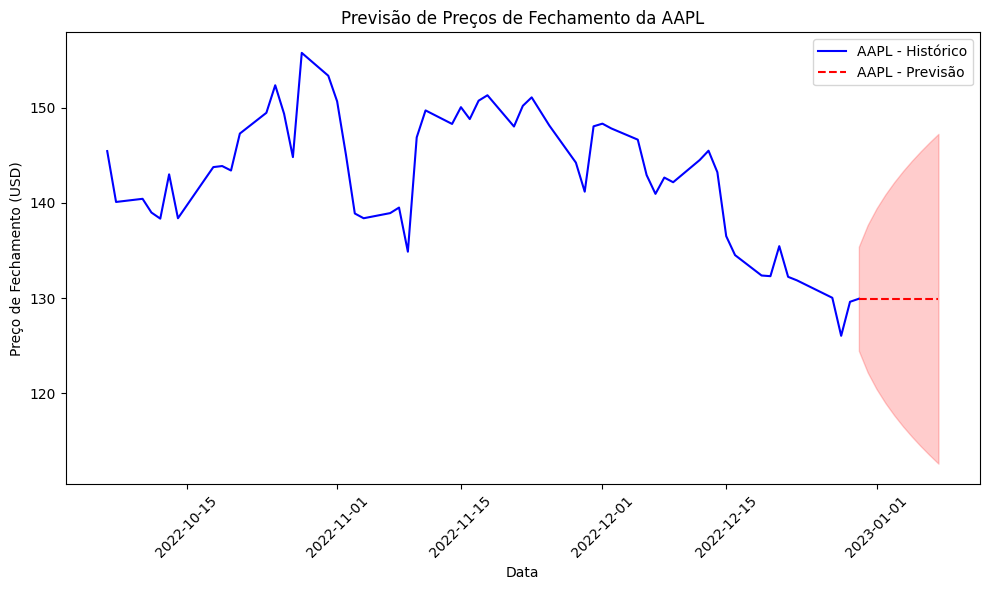

In [8]:
import yfinance as yf
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Baixando dados de fechamento, volume, máximo e mínimo das ações da Apple (AAPL) 
# e do preço de fechamento do índice S&P 500 (GSPC) do Yahoo Finance
dados_aapl = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
dados_volume = yf.download('AAPL', start='2020-01-01', end='2023-01-01')['Volume']
dados_max = yf.download('AAPL', start='2020-01-01', end='2023-01-01')['High']
dados_min = yf.download('AAPL', start='2020-01-01', end='2023-01-01')['Low']
dados_sp500_close = yf.download('^GSPC', start='2020-01-01', end='2023-01-01')['Close']

# Criando um DataFrame para combinar os dados
dados = pd.DataFrame({'AAPL': dados_aapl['Close'], 
                      'Volume': dados_volume, 
                      'Max': dados_max,
                      'Min': dados_min,
                      'SP500_Close': dados_sp500_close}).dropna()

# Definindo as variáveis endógenas (y) e exógenas (X)
X = dados[['Volume', 'Max', 'Min', 'SP500_Close']]  # Variáveis exógenas
y = dados['AAPL']  # Variável endógena

# Ajuste automático do modelo ARIMA com busca de hiperparâmetros
modelo_auto = auto_arima(y, exogenous=X, seasonal=False, 
                         start_p=1, d=None, start_q=1, 
                         max_p=2, max_d=1, max_q=2, 
                         max_order=None, 
                         stepwise=True,
                         suppress_warnings=True,
                         trace=True,
                         maxiter=500,  # Limita o número de tentativas
                         max_models=200)  # Limita o número máximo de modelos avaliados

# Resumo do modelo
print(modelo_auto.summary())

# Realizando previsões para os próximos 10 dias
previsoes, intervalo_confianca = modelo_auto.predict(n_periods=10, exogenous=X.iloc[-10:], 
                                                     return_conf_int=True)

# Visualização dos resultados
plt.figure(figsize=(10, 6))

# Plotando os dados históricos
plt.plot(y.iloc[-60:], label='AAPL - Histórico', color='blue')

# Plotando as previsões para os próximos 10 dias contra os dados reais
datas_previsao = pd.date_range(start=y.index[-1], periods=10)
plt.plot(datas_previsao, previsoes, label='AAPL - Previsão', color='red', linestyle='--')
plt.fill_between(datas_previsao, 
                 intervalo_confianca[:, 0], 
                 intervalo_confianca[:, 1], 
                 color='red', alpha=0.2)

# Adicionando detalhes ao gráfico
plt.title('Previsão de Preços de Fechamento da AAPL')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
